# Deconvolution stages example

### March 16, 2021

## Code

In [5]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
import math
import numpy as np
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes")
# import deDisperse_util as util
# from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")
import pyrex.custom.ara as ara


In [6]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

## Signal at antenna

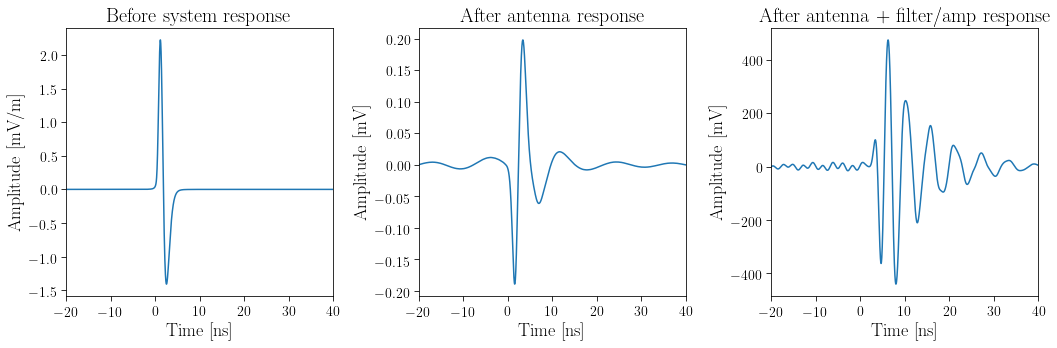

In [21]:
p = pyrex.Particle("nu_e", (0, 0, -1000), (0, 0, 1), 1e9)
p.interaction.em_frac = 0
p.interaction.had_frac = 1
signal_in = pyrex.AskaryanSignal(times=np.linspace(-50e-9, 50e-9, 4001), particle=p, viewing_angle=np.radians(58), viewing_distance=5000)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].plot(signal_in.times*1e9, signal_in.values*1E3)
# ax[0].grid()
ax[0].set_xlabel("Time [ns]")
ax[0].set_ylabel("Amplitude [mV/m]")
ax[0].set_xlim(-20,40)
ax[0].set_title("Before system response")

vpol = ara.VpolAntenna("VPol", (0, 0, -200), 0)
vpol.set_orientation(z_axis=(0, 0, 1), x_axis=(1, 0, 0))

hpol = ara.HpolAntenna("HPol", (0, 0, -200), 0)
hpol.set_orientation(z_axis=(0, 0, 1), x_axis=(1, 0, 0))


pol_ev = np.array([0.,0,1])
dirProp = np.array([0,1,0])

phi = np.arctan2(dirProp[1],dirProp[0])
# print("phi:%0.2f"%phi)
theta = np.arccos(dirProp[2])

vpol_mid = vpol.apply_response(signal_in, direction=dirProp, polarization=pol_ev, force_real=True)
vpol_out = vpol.front_end(vpol_mid)

hpol_mid = hpol.apply_response(signal_in, direction=dirProp, polarization=pol_ev, force_real=True)
hpol_out = hpol.front_end(hpol_mid)

ax[1].plot(vpol_mid.times*1e9, vpol_mid.values*1E3, label=vpol.name)
# ax[1].plot(hpol_mid.times*1e9, hpol_mid.values*1E3, label=hpol.name)

# ax[1].grid()
ax[1].set_xlabel("Time [ns]")
ax[1].set_ylabel("Amplitude [mV]")
# ax[1].legend(fontsize = 13)
ax[1].set_xlim(-20,40)
ax[1].set_title("After antenna response")


ax[2].plot(vpol_out.times*1e9, vpol_out.values*1E3, label=vpol.name)

# ax[2].grid()
ax[2].set_xlabel("Time [ns]")
ax[2].set_ylabel("Amplitude [mV]")
ax[2].set_xlim(-20,40)
ax[2].set_title("After antenna + filter/amp response")

plt.tight_layout()
plt.savefig("./AskaryanThreeStages.pdf")

In [4]:
vpol = ara.VpolAntenna("VPol", (0, 0, -200), 0)
vpol.set_orientation(z_axis=(0, 0, 1), x_axis=(1, 0, 0))

hpol = ara.HpolAntenna("HPol", (0, 0, -200), 0)
hpol.set_orientation(z_axis=(0, 0, 1), x_axis=(1, 0, 0))

In [5]:
pol_ev = np.array([0.,0,1])
dirProp = np.array([0,1,0])
# pol_ev = np.array([0.73464503,0.66096714,0.15303304])
# dirProp = np.array([0.12301928,0.09204764,0.98812625])

# dirProp = random_three_vector()
phi = np.arctan2(dirProp[1],dirProp[0])
print("phi:%0.2f"%phi)
theta = np.arccos(dirProp[2])

phi:1.57


In [6]:
vpol_mid = vpol.apply_response(signal_in, direction=dirProp, polarization=pol_ev, force_real=True)
vpol_out = vpol.front_end(vpol_mid)

hpol_mid = hpol.apply_response(signal_in, direction=dirProp, polarization=pol_ev, force_real=True)
hpol_out = hpol.front_end(hpol_mid)


<Figure size 504x288 with 0 Axes>

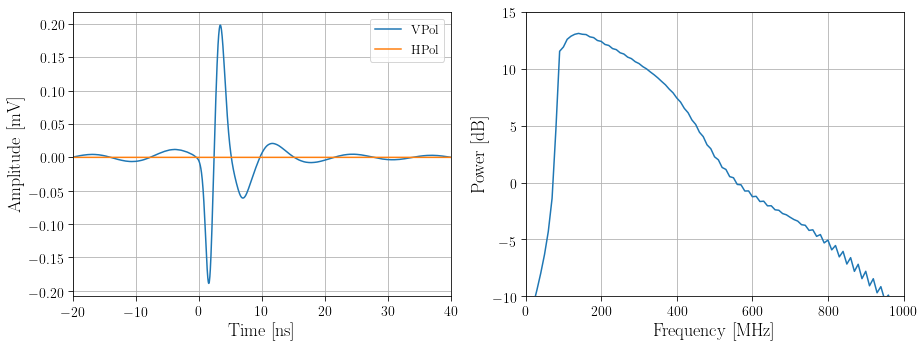

In [7]:
plt.figure(figsize=(7,4))

# plt.plot(vpol_mid.times*1e9, vpol_mid.values*1E3, label=vpol.name)
# plt.plot(hpol_mid.times*1e9, hpol_mid.values*1E3, label=hpol.name)
# plt.legend(fontsize = 13)
# plt.grid()
# plt.xlabel("Time [ns]")
# plt.ylabel("Amplitude [mV]")

fig, ax = plt.subplots(1, 2, figsize=(13,5))
ax[0].plot(vpol_mid.times*1e9, vpol_mid.values*1E3, label=vpol.name)
ax[0].plot(hpol_mid.times*1e9, hpol_mid.values*1E3, label=hpol.name)

ax[0].grid()
ax[0].set_xlabel("Time [ns]")
ax[0].set_ylabel("Amplitude [mV]")
ax[0].legend(fontsize = 13)
ax[0].set_xlim(-20,40)

fft, freq, dT = util.doFFT(vpol_mid.times*1e9, vpol_mid.values*1E3)
ax[1].plot(freq,10*np.log10(abs(fft)))
ax[1].set_xlim(0,1000)
ax[1].set_ylim(-10,15)
ax[1].grid()
ax[1].set_xlabel("Frequency [MHz]")
ax[1].set_ylabel("Power [dB]")

plt.tight_layout()
plt.savefig("./PulseAntennaResponse.pdf")

<Figure size 504x288 with 0 Axes>

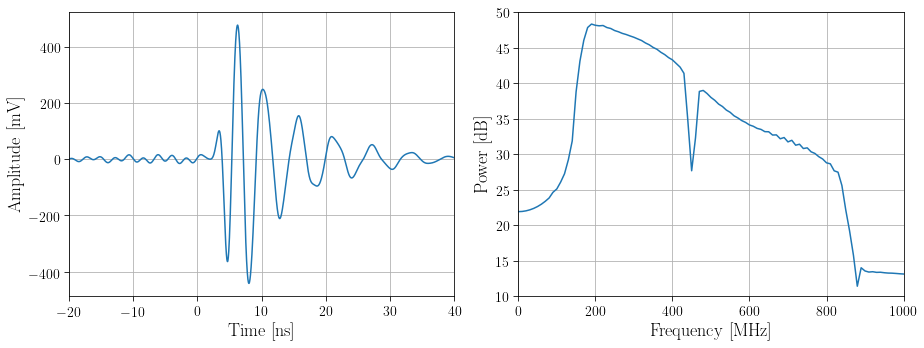

In [8]:
plt.figure(figsize=(7,4))

# plt.plot(vpol_mid.times*1e9, vpol_mid.values*1E3, label=vpol.name)
# plt.plot(hpol_mid.times*1e9, hpol_mid.values*1E3, label=hpol.name)
# plt.legend(fontsize = 13)
# plt.grid()
# plt.xlabel("Time [ns]")
# plt.ylabel("Amplitude [mV]")

fig, ax = plt.subplots(1, 2, figsize=(13,5))
ax[0].plot(vpol_out.times*1e9, vpol_out.values*1E3, label=vpol.name)
# ax[0].plot(hpol_out.times*1e9, hpol_out.values*1E3, label=hpol.name)

ax[0].grid()
ax[0].set_xlabel("Time [ns]")
ax[0].set_ylabel("Amplitude [mV]")
ax[0].set_xlim(-20,40)

fft, freq, dT = util.doFFT(vpol_out.times*1e9, vpol_out.values*1E3)
ax[1].plot(freq,10*np.log10(abs(fft)))
ax[1].set_xlim(0,1000)
ax[1].set_ylim(10,50)
ax[1].grid()
ax[1].set_xlabel("Frequency [MHz]")
ax[1].set_ylabel("Power [dB]")

plt.tight_layout()
plt.savefig("./PulseAntennaFilterResponse.pdf")

<Figure size 504x288 with 0 Axes>

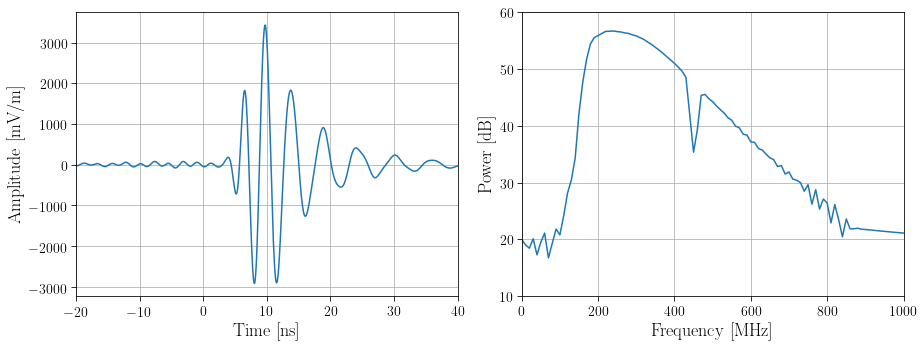

In [14]:
plt.figure(figsize=(7,4))

# plt.plot(vpol_mid.times*1e9, vpol_mid.values*1E3, label=vpol.name)
# plt.plot(hpol_mid.times*1e9, hpol_mid.values*1E3, label=hpol.name)
# plt.legend(fontsize = 13)
# plt.grid()
# plt.xlabel("Time [ns]")
# plt.ylabel("Amplitude [mV]")

fig, ax = plt.subplots(1, 2, figsize=(13,5))
v,t = util.deConvolve_antenna(vpol_out.times*1e9, vpol_out.values*1E3, np.pi/2, 0, 0)
ax[0].plot(v[1:],t)
# ax[0].plot(hpol_out.times*1e9, hpol_out.values*1E3, label=hpol.name)

ax[0].grid()
ax[0].set_xlabel("Time [ns]")
ax[0].set_ylabel("Amplitude [mV/m]")
ax[0].set_xlim(-20,40)

fft, freq, dT = util.doFFT(v,t)
ax[1].plot(freq,10*np.log10(abs(fft)))
ax[1].set_xlim(0,1000)
ax[1].set_ylim(10,60)
ax[1].grid()
ax[1].set_xlabel("Frequency [MHz]")
ax[1].set_ylabel("Power [dB]")

plt.tight_layout()
plt.savefig("./PulseDeconvolved.pdf")